In [6]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [7]:
import numpy as np
import pandas as pd

In [8]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [9]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [10]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [11]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [12]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [13]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [14]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

<AxesSubplot:xlabel='date'>

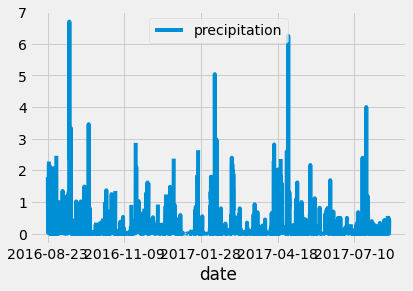

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
one_yr_prcp_df = pd.DataFrame(results, columns=['date','precipitation'])
one_yr_prcp_df.set_index(one_yr_prcp_df['date'], inplace=True)
# Sort the dataframe by date
one_yr_prcp_df = one_yr_prcp_df.sort_index()
# Use Pandas Plotting with Matplotlib to plot the data
one_yr_prcp_df.plot()


<AxesSubplot:xlabel='date'>

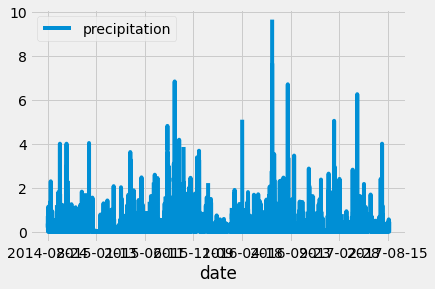

In [16]:
# Design a query to retrieve the last 36 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date three years from the last date in data set.
prev_three_year = dt.date(2017, 8, 23) - dt.timedelta(days=1095)
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= prev_three_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
three_yr_prcp_df = pd.DataFrame(results, columns=['date','precipitation'])
three_yr_prcp_df.set_index(three_yr_prcp_df['date'], inplace=True)

# Sort the dataframe by date
three_yr_prcp_df = three_yr_prcp_df.sort_index()
# Use Pandas Plotting with Matplotlib to plot the data
three_yr_prcp_df.plot()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
round(one_yr_prcp_df.describe(),2)


,precipitation
count,2021.00
mean,0.18
std,0.46
min,0.00
25%,0.00
50%,0.02
75%,0.13
max,6.70


In [18]:
round(three_yr_prcp_df.describe(),2)


,precipitation
count,6347.00
mean,0.18
std,0.48
min,0.00
25%,0.00
50%,0.02
75%,0.14
max,9.64


In [19]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9,)]

In [20]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

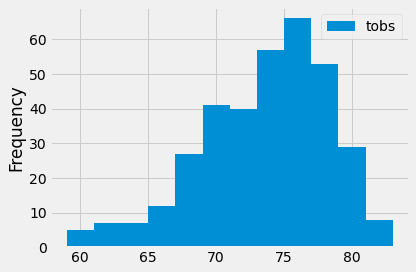

In [22]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station... 
results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= prev_year).all()
#print(results)

temp_obs_df = pd.DataFrame(results, columns=['tobs'])
#df.set_index(df['tobs'],inplace=True)
#print(df)

# ...and plot the results as a histogram
temp_obs_df.plot.hist(bins=12)
plt.tight_layout()

# Challenge